In [ ]:
import pandas as pd
from google.colab import drive 
drive.mount('/gdrive', force_remount=True)
import tensorflow.compat.v1 as tf
import numpy as np

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
df_train = pd.read_csv("/gdrive/My Drive/Kaggle/sentiment-analysis-on-movie-reviews/train.tsv", delimiter='\t')
df_test = pd.read_csv("/gdrive/My Drive/Kaggle/sentiment-analysis-on-movie-reviews/test.tsv", delimiter='\t')
df_=pd.concat([df_train, df_test], axis=0)
df_.reset_index(inplace=True)
df_.drop(['index'],axis=1, inplace=True)
split_length = df_train.shape[0]

In [ ]:
from keras.utils import to_categorical
target=df_train.Sentiment.values
y_target=to_categorical(target)
num_classes=y_target.shape[1]

Using TensorFlow backend.


In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

stop_words = stopwords.words('english') # Mots sans informations 
porter = PorterStemmer()
new_phrase=[]

for i in range(df_.shape[0]):
  words = df_['Phrase'].iloc[i]
  tokens = word_tokenize(words)
  tok = [word for word in tokens if word.isalpha()]
  tok = [word.lower() for word in tok]
  tok_ = [word for word in tok if not word in stop_words]
  stemmed = [porter.stem(word) for word in tok_]
  new_phrase.append(stemmed)
df_['NewPhrase'] = new_phrase # liste de mots racinalisés en lower case et sans ponctuation

In [ ]:
length=[]
for e in new_phrase:
  length.append(len(e))
max_length = max(length)# Nombre de mots distincts dans l'avis en contenant le plus

In [ ]:
count=0
score=[]
j=0
for i in df_['NewPhrase']:
  if len(i) == 0:
    count+=1 # Nombre de ligne ou aucun mot n'apparait (à priori le sentiment devrait être égale à 2)
    score.append(df_['Sentiment'].iloc[j])
  j+=1

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



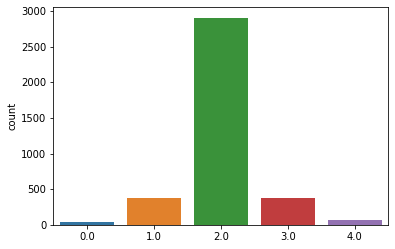

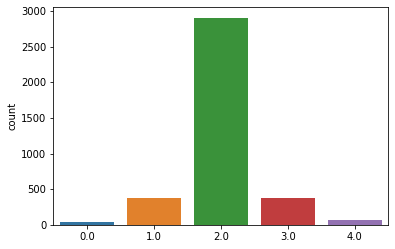

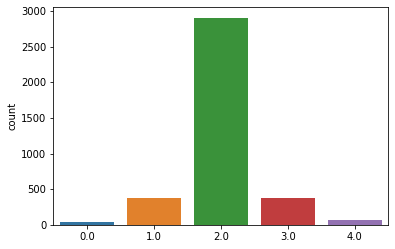

In [ ]:
import seaborn as sns
sns.countplot(x=score)

In [ ]:
vocab=[]
for i in df_['NewPhrase']:
  vocab+=i
len(vocab) # On concatene ici tous les avis néttoyés

812660

812660

812660

In [ ]:
import collections
cnt = collections.Counter() # On crée un compteur pour compter l'apparition de chaque mot
for word in vocab:
  cnt[word] += 1

In [ ]:
min_occurane = 1 # On filtre les mots apparaissante moins de min_occurane fois
tokens = [k for k,c in cnt.items() if c >= min_occurane] # Liste des mots distincts conservés
n_words = len(tokens)
print(n_words)

11600
11600
11600


In [ ]:
df_copy=df_.copy() # On crée un copie du DF original pour ne pas risquer d'écraser les data
for i in range(df_['NewPhrase'].shape[0]):
  token_ =[w for w in df_['NewPhrase'].iloc[i] if w in tokens]
  df_copy.at[i,'NewPhrase'] = token_ # la colonne 'Phrase' est recréee et appelée 'NewPhrase'. Elle correspond à la colonne 'Phrase' mais totalement nettoyée:
  # Plus de ponctuation, plus de uppercase, uniquement de mots racinalisés, plus de stop_words

In [ ]:
lenght=[]
for i in df_['NewPhrase']:
  length.append(len(i))
max_length = max(length) # Avis ayant le plus grands nombre de mots après nettoyage

In [ ]:
from keras.preprocessing import sequence
X=[]
Y=[]
for i in range(df_.shape[0]):
  X.append(df_['NewPhrase'].iloc[i]) # On crée un liste de liste contenant les 'NewPhrase' sous forme de liste

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=n_words)
tokenizer.fit_on_texts(X) #Fitter sur tokens: la liste de mots distincts ? Non car les mots distincts sont labélisés
# Il faut donc surement utiliser 

X = tokenizer.texts_to_sequences(X)
X = sequence.pad_sequences(X, maxlen=max_length, padding='pre') # Zero padding pour normaliser la longueur de chaque avis

In [ ]:
x_train = X[0:split_length,:] # On récupère le train_set preparé pour entrainer le NN
x_sub = X[split_length:,:] # On récupère le test set préparé pour ensuite faire une soumission

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train, y_target, test_size=0.2, random_state=1) # On split les data en train set et validation set

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras import models
from keras.losses import categorical_crossentropy
from keras.losses import sparse_categorical_crossentropy

early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_accuracy', patience = 2) # Eviter d'overfitter
callback = [early_stopping]

In [ ]:
model=models.Sequential()
model.add(layers.Embedding(input_dim=n_words, output_dim=400, input_length=max_length))
model.add(layers.LSTM(256, dropout=0.3, return_sequences=True))
model.add(layers.LSTM(128, dropout=0.3, return_sequences=False))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 28, 400)           4640000   
_________________________________________________________________
lstm (LSTM)                  (None, 28, 256)           672768    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 5,514,181
Trainable params: 5,514,181
Non-trainable params: 0
______________________________________________

In [ ]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=7, batch_size=512, verbose=1, callbacks=callback)

Epoch 1/7
244/244 [==============================] - 32s 131ms/step - loss: 1.1582 - accuracy: 0.5412 - val_loss: 0.9526 - val_accuracy: 0.6176
Epoch 2/7
244/244 [==============================] - 30s 122ms/step - loss: 0.9074 - accuracy: 0.6385 - val_loss: 0.8862 - val_accuracy: 0.6408
Epoch 3/7
244/244 [==============================] - 30s 123ms/step - loss: 0.8376 - accuracy: 0.6616 - val_loss: 0.8640 - val_accuracy: 0.6498
Epoch 4/7
244/244 [==============================] - 30s 123ms/step - loss: 0.7942 - accuracy: 0.6780 - val_loss: 0.8623 - val_accuracy: 0.6520
Epoch 5/7
244/244 [==============================] - 30s 121ms/step - loss: 0.7583 - accuracy: 0.6896 - val_loss: 0.8596 - val_accuracy: 0.6537
Epoch 6/7
244/244 [==============================] - 30s 122ms/step - loss: 0.7299 - accuracy: 0.6990 - val_loss: 0.8644 - val_accuracy: 0.6538
Epoch 7/7
244/244 [==============================] - 30s 121ms/step - loss: 0.7055 - accuracy: 0.7061 - val_loss: 0.8740 - val_accuracy:

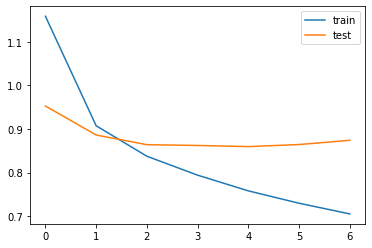

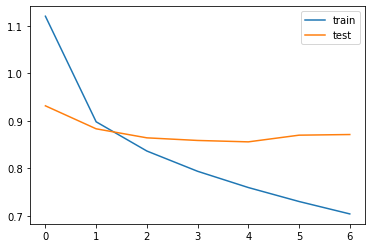

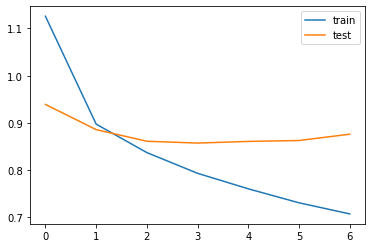

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

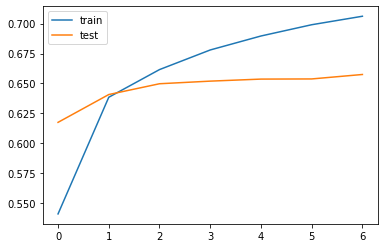

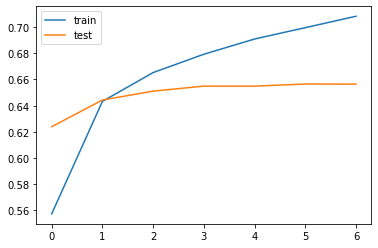

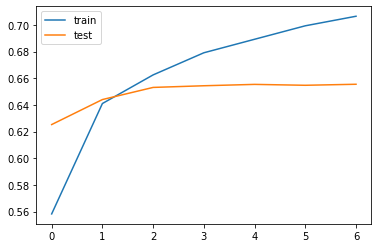

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(x_sub)

In [ ]:
len(pred)

66292

66292

66292

In [ ]:
prediction=[]
for p in range(len(pred)):
  prediction.append(np.argmax(pred[p]))

In [ ]:
df_submission = pd.DataFrame()
df_submission['PhraseId'] = df_test['PhraseId']
df_submission['Sentiment'] = prediction

df_submission.to_csv(r'/gdrive/My Drive/Kaggle/sentiment-analysis-on-movie-reviews/submission_8.csv', index = False)